In [1]:
import pandas as pd
import numpy as np


In [2]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

In [3]:
train = pd.read_csv("../dataset/original/train.csv")
test = pd.read_csv("../dataset/original/x_test.csv")

In [4]:
train.shape

(5719, 11)

In [5]:
test.shape


(300, 10)

In [6]:
def convert_date(df):
    df['Unnamed: 0'] = df['Unnamed: 0'].str.split(" ")
    df['Unnamed: 0'] = df['Unnamed: 0'].apply(lambda x: "-".join(x[1:]))
    df = df.rename(columns={'Unnamed: 0':'Date'})
    df = df.rename(columns={'sales w-1':'salesW_1'})
    df = df.rename(columns={'POS_exposed w-1':'POS_exposedW_1'})
    df = df.rename(columns={'volume_on_promo w-1':'volume_on_promoW_1'})
    df.Date = pd.to_datetime(df.Date)
    return df

In [7]:
df = pd.concat([train, test],sort=False)
df

,Unnamed: 0,sku,pack,size (GM),brand,price,POS_exposed w-1,volume_on_promo w-1,sales w-1,scope,target
0,WE 10 December 2016,2689,SINGLE,395.41,BRAND1,1.16,NaN,NaN,NaN,0,24175.0
1,WE 17 December 2016,2689,SINGLE,395.41,BRAND1,1.15,1.0,17.676112,24175.0,0,23521.0
2,WE 24 December 2016,2689,SINGLE,395.41,BRAND1,1.16,1.0,24.482803,23521.0,0,22075.0
3,WE 31 December 2016,2689,SINGLE,395.41,BRAND1,1.16,0.0,19.410646,22075.0,0,16492.0
4,WE 07 January 2017,2689,SINGLE,395.41,BRAND1,1.16,0.0,29.812030,16492.0,0,25971.0
5,WE 14 January 2017,2689,SINGLE,395.41,BRAND1,1.16,0.0,29.058565,25971.0,0,26627.0
6,WE 21 January 2017,2689,SINGLE,395.41,BRAND1,1.16,1.0,41.877418,26627.0,0,26122.0
7,WE 28 January 2017,2689,SINGLE,395.41,BRAND1,1.16,0.0,22.448511,26122.0,0,26358.0
8,WE 04 February 2017,2689,SINGLE,395.41,BRAND1,1.16,0.0,22.165187,26358.0,0,26844.0
9,WE 11 February 2017,2689,SINGLE,395.41,BRAND1,1.16,0.0,22.744747,26844.0,0,25891.0


In [8]:
df = convert_date(df)
df = df.sort_values(['sku','Date'])
#min(df[df.sku==2718].Date)
df

,Date,sku,pack,size (GM),brand,price,POS_exposedW_1,volume_on_promoW_1,salesW_1,scope,target
665,2016-12-10,144,MULTI,114.23,BRAND2,2.18,NaN,NaN,NaN,1,51320.0
666,2016-12-17,144,MULTI,114.23,BRAND2,2.00,45.0,100.000000,51320.0,1,66431.0
667,2016-12-24,144,MULTI,114.23,BRAND2,2.05,17.0,100.000000,66431.0,1,57001.0
668,2016-12-31,144,MULTI,114.23,BRAND2,3.00,2.0,100.000000,57001.0,1,15052.0
669,2017-01-07,144,MULTI,114.23,BRAND2,2.99,2.0,28.534193,15052.0,1,22016.0
670,2017-01-14,144,MULTI,114.23,BRAND2,3.00,0.0,6.251590,22016.0,1,21762.0
671,2017-01-21,144,MULTI,114.23,BRAND2,2.19,0.0,0.000000,21762.0,1,46125.0
672,2017-01-28,144,MULTI,114.23,BRAND2,2.00,13.0,100.000000,46125.0,1,65842.0
673,2017-02-04,144,MULTI,114.23,BRAND2,2.00,26.0,100.000000,65842.0,1,70514.0
674,2017-02-11,144,MULTI,114.23,BRAND2,2.31,37.0,100.000000,70514.0,1,41614.0


# Categorical to Numerical


In [9]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df.pack = le.fit_transform(df.pack)
le.classes_

array(['MULTI', 'SINGLE'], dtype=object)

In [10]:
df.brand = le.fit_transform(df.brand)
le.classes_

array(['BRAND1', 'BRAND2', 'BRAND3', 'BRAND4', 'BRAND5'], dtype=object)

In [11]:
df = df.astype({'pack':int, 'brand':int})

In [12]:
df.columns
#max(df[df.sku==1608].target)

Index(['Date', 'sku', 'pack', 'size (GM)', 'brand', 'price', 'POS_exposedW_1',
       'volume_on_promoW_1', 'salesW_1', 'scope', 'target'],
      dtype='object')

# Plot

In [13]:
train = df[~df.target.isna()]
train.shape
test = df[df.target.isna()]
test.shape

(300, 11)

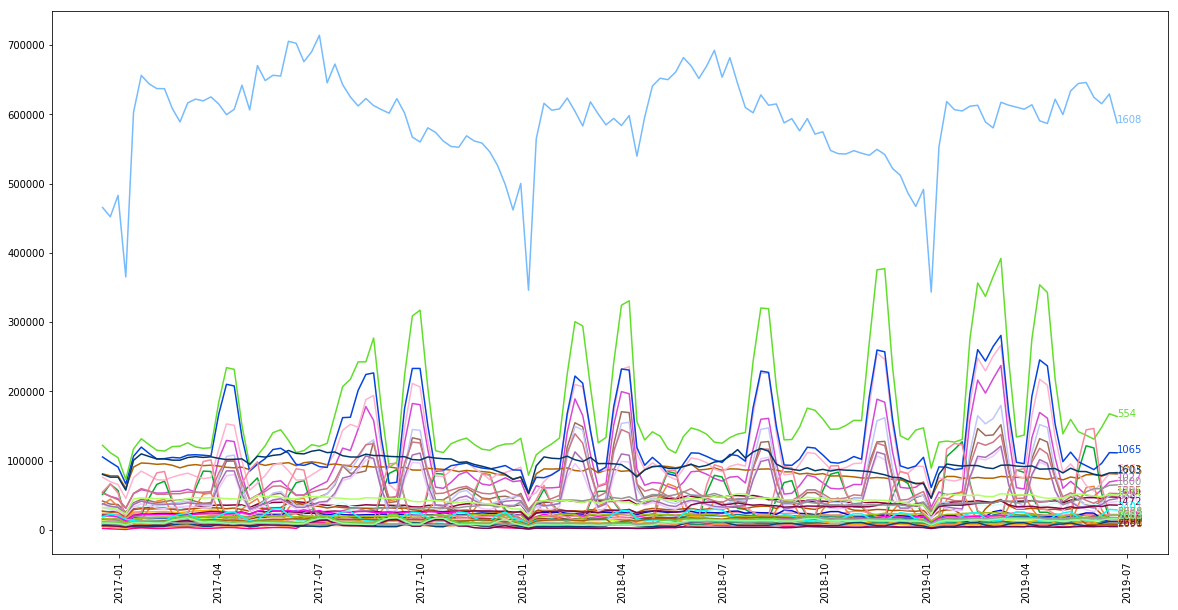

In [14]:
train = train.reset_index()

mycolors = np.random.choice(list(mpl.colors.XKCD_COLORS.keys()), len(set(df.sku)), replace=False)
plt.figure(figsize=(20,10))
plt.xticks(rotation=90)
for i, s in enumerate(set(train.sku)):
    plt.plot(train[train.sku==s].Date, train[train.sku==s].salesW_1,  color=mycolors[i])
    last_x, last_y = train[train.sku==s].Date.values[-1], train[train.sku==s].salesW_1.values[-1]
    plt.text(last_x, last_y, str(s), color=mycolors[i])

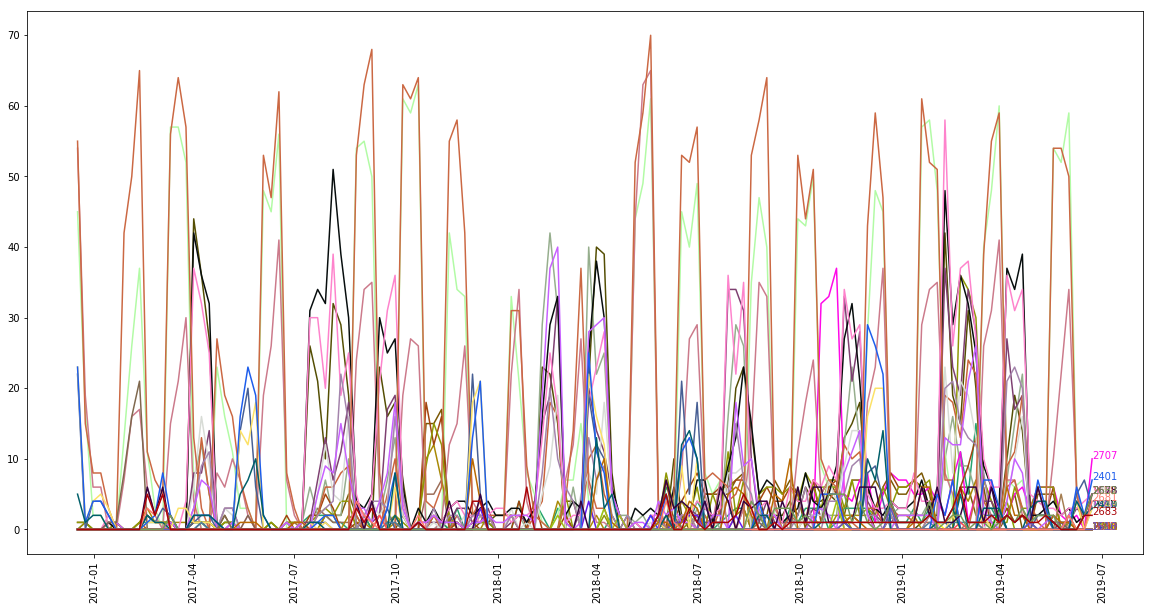

In [15]:
mycolors = np.random.choice(list(mpl.colors.XKCD_COLORS.keys()), len(set(df.sku)), replace=False)
plt.figure(figsize=(20,10))
plt.xticks(rotation=90)
for i, s in enumerate(set(train.sku)):
    plt.plot(train[train.sku==s].Date, train[train.sku==s].POS_exposedW_1,  color=mycolors[i])
    last_x, last_y = train[train.sku==s].Date.values[-1], train[train.sku==s].POS_exposedW_1.values[-1]
    plt.text(last_x, last_y, str(s), color=mycolors[i])

## CLUSTERING

In [16]:
from scipy.spatial.distance import cdist, pdist
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from scipy import stats
from scipy.stats import pearsonr


In [17]:
from dtaidistance import dtw
from dtaidistance import dtw_visualisation as dtwvis

In [18]:
#s11=(train[train.sku==554].target).values
#s22=(train[train.sku==1065].target).values
#dist=pearsonr(s11,s22)
#dist

In [19]:
#path = dtw.warping_path(s1, s2)
#path1 =dtw.warping_path(s1, s3)
#dtwvis.plot_warping(s1, s2, path)
#dtwvis.plot_warping(s1, s3, path)


In [20]:
#d = dtw.distance_fast(s1, s2)
#d1=dtw.distance_fast(s1, s3)
#print(d,d1)

## DTW DISTANCE

In [21]:
series=[]
for i, s in enumerate(set(train.sku)):
    
    series.append(stats.zscore(((train[train.sku==s].target).values)))

series=np.asarray(series)


In [22]:
z = linkage(series,'single',metric=dtw.distance_fast)

print('z has %d rows'%(z.shape[0]))


z has 42 rows


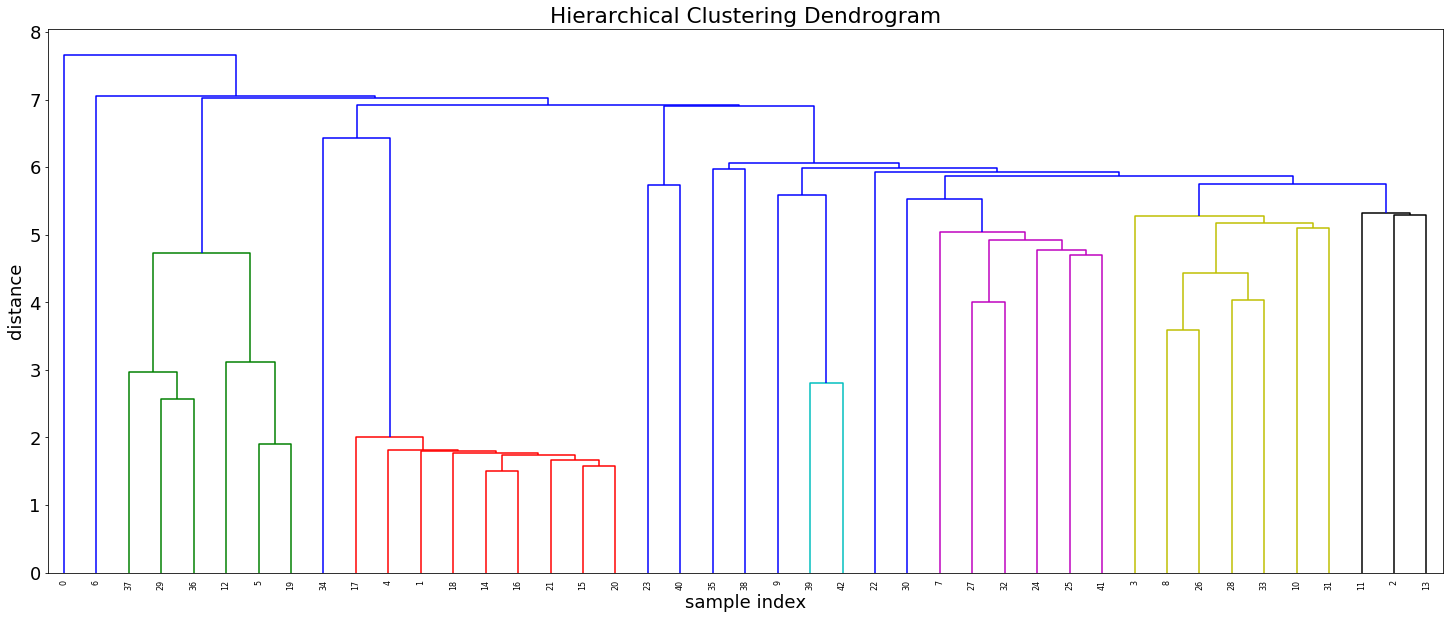

In [23]:
plt.figure(figsize=(25, 10))
font = {'family' : 'sans', 'size'   : 18}
plt.rc('font', **font)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(z, 
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
)
plt.show()

## CORRELATION DISTANCE

In [24]:
series1=[]
for i, s in enumerate(set(train.sku)):
    series1.append(((train[train.sku==s].target).values))

series1=np.asarray(series1)

z1= linkage(series1,'single',metric='correlation')
print('z1 has %d rows'%(z1.shape[0]))

z1 has 42 rows


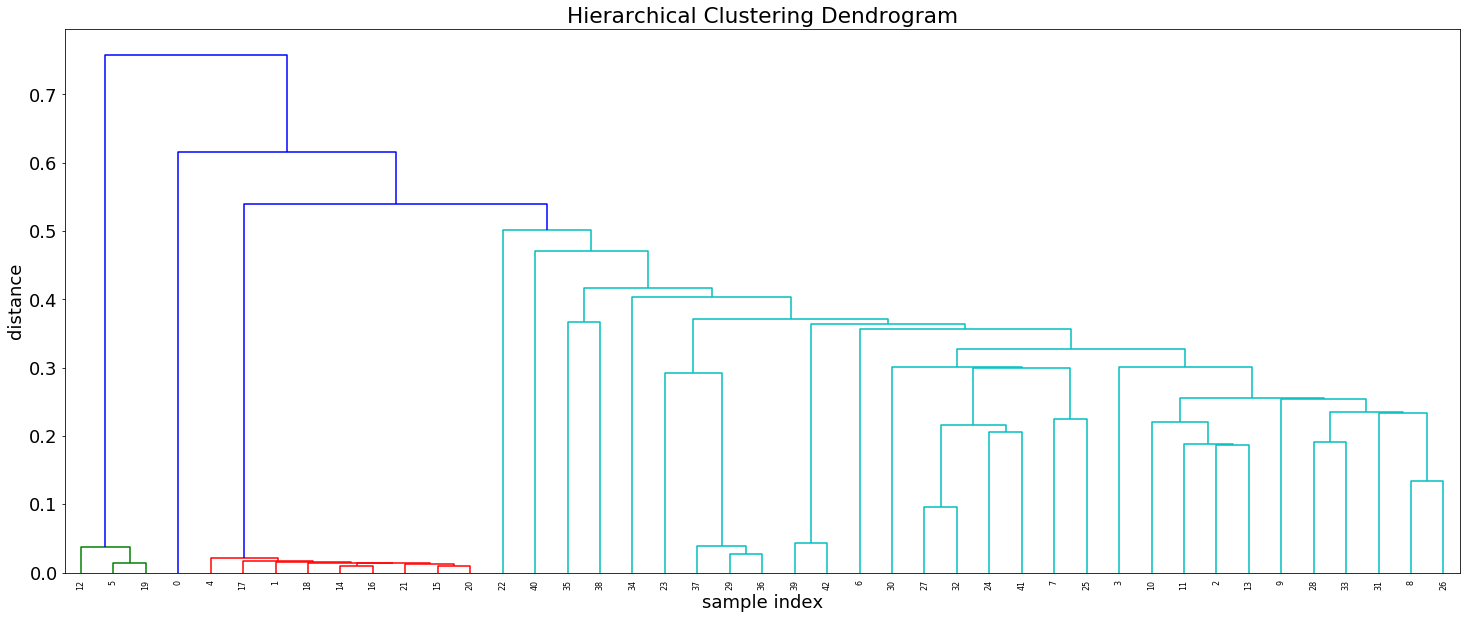

In [25]:
plt.figure(figsize=(25, 10))
font = {'family' : 'sans', 'size'   : 18}
plt.rc('font', **font)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(z1, 
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
)
plt.show()

## PEARSON CORRELATION (Non Fa)

In [26]:

series2=[]
for i, s in enumerate(set(train.sku)):
    series2.append(((train[train.sku==s].target).values))

series2=np.asarray(series2)
print (series2)
z2= linkage(series2,'single',metric=pearsonr)
print('z1 has %d rows'%(z1.shape[0]))

[[24175. 23521. 22075. ...  8426.  8246. 13702.]
 [54158. 48676. 45389. ... 69399. 71405. 66337.]
 [14100. 13554. 13173. ... 10870. 10908. 19403.]
 ...
 [ 6175.  6103.  5427. ...  5489.  5530.  5088.]
 [ 9094.  8978.  8570. ... 18312. 18057. 17440.]
 [10192.  9850.  9436. ... 16071. 16265. 15298.]]


ValueError: setting an array element with a sequence.

# Cutted Dendogram 

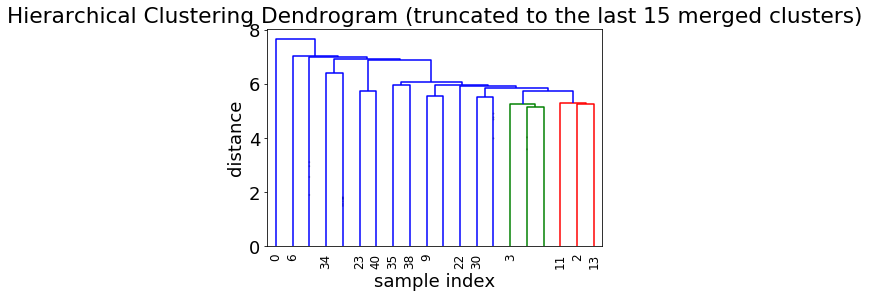

In [27]:
plt.title('Hierarchical Clustering Dendrogram (truncated to the last 15 merged clusters)')
font = {'family' : 'sans', 'size'   : 18}
plt.rc('font', **font)
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(
    z,
    truncate_mode='lastp',  
    p=20, 
    show_leaf_counts=False, 
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,  
)
plt.show()

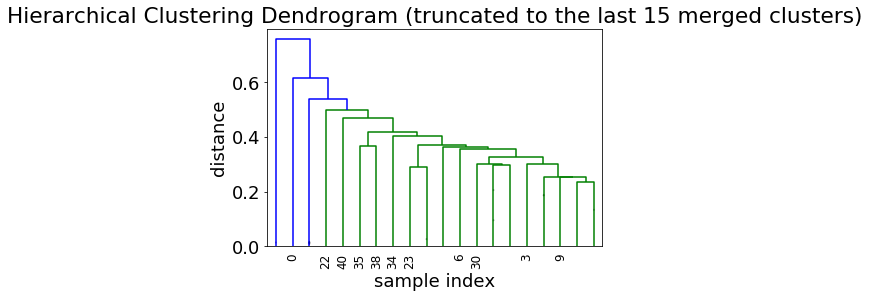

In [28]:
plt.title('Hierarchical Clustering Dendrogram (truncated to the last 15 merged clusters)')
font = {'family' : 'sans', 'size'   : 18}
plt.rc('font', **font)
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(
    z1,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=20,  # show only the last p merged clusters
    show_leaf_counts=False,  # otherwise numbers in brackets are counts
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,  # to get a distribution impression in truncated branches
)
plt.show()

## Knee and Elbow Analysis using Correlation

In [29]:
wss_values = []
bss_values = []
k_values = range(1,20)

for k in k_values:
    clustering = fcluster(z1, k, criterion='maxclust')
    centroids = [np.mean(series1[clustering==c],axis=0) for c in range(1,k+1)]
    cdist(series1, centroids, 'correlation')
    D = cdist(series1, centroids,'correlation')
    cIdx = np.argmin(D,axis=1)
    d = np.min(D,axis=1)

    avgWithinSS = sum(d)/series1.shape[0]

    # Total with-in sum of square
    wss = sum(d**2)

    tss = sum(pdist(series1,metric='correlation')**2)/series1.shape[0]
    
    bss = tss-wss
    
    wss_values += [wss]
    bss_values += [bss]

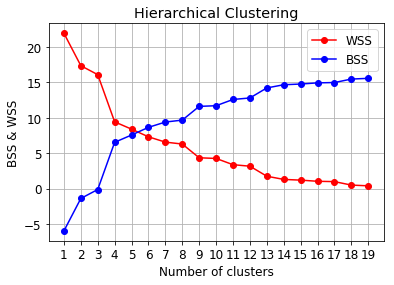

In [30]:
fig = plt.figure()
font = {'family' : 'sans', 'size'   : 12}
plt.rc('font', **font)
plt.plot(k_values, wss_values, 'bo-', color='red', label='WSS')
plt.plot(k_values, bss_values, 'bo-', color='blue', label='BSS')
plt.grid(True)
plt.xlabel('Number of clusters')
plt.ylabel('BSS & WSS')
plt.xticks(k_values)
plt.legend()
plt.title('Hierarchical Clustering');

# Knee\Elbow with DTW distance

In [31]:
wss_values = []
bss_values = []
k_values = range(1,20)

for k in k_values:
    clustering = fcluster(z, k, criterion='maxclust')
    centroids = [np.mean(series[clustering==c],axis=0) for c in range(1,k+1)]
    cdist(series, centroids, metric=dtw.distance_fast)
    D = cdist(series, centroids,metric=dtw.distance_fast)
    cIdx = np.argmin(D,axis=1)
    d = np.min(D,axis=1)

    avgWithinSS = sum(d)/series.shape[0]

    # Total with-in sum of square
    wss = sum(d**2)

    tss = sum(pdist(series,metric=dtw.distance_fast)**2)/series.shape[0]
    
    bss = tss-wss
    
    wss_values += [wss]
    bss_values += [bss]

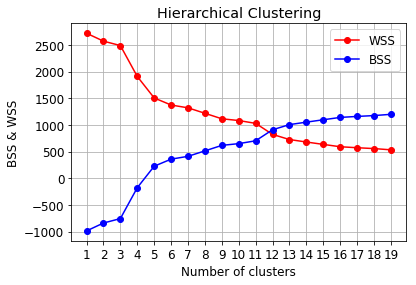

In [32]:
fig = plt.figure()
font = {'family' : 'sans', 'size'   : 12}
plt.rc('font', **font)
plt.plot(k_values, wss_values, 'bo-', color='red', label='WSS')
plt.plot(k_values, bss_values, 'bo-', color='blue', label='BSS')
plt.grid(True)
plt.xlabel('Number of clusters')
plt.ylabel('BSS & WSS')
plt.xticks(k_values)
plt.legend()
plt.title('Hierarchical Clustering');

In [35]:
label_corr=fcluster(z1,4,criterion='maxclust') #Cluster with "correlation distance measure"
sku=list((set(train.sku)))

data={'Label': label_corr,
     'Sku':sku}
df_cluster=pd.DataFrame(data, columns=['Label','Sku'])

df_cluster

,Label,Sku
0,4,2689
1,2,1027
2,3,2696
3,3,2698
4,2,1035
5,1,144
6,3,2704
7,3,1554
8,3,2705
9,3,2707


# Clustering plot using Correlation

In [48]:
#Timeseries of 1st cluster
cluster1=df_cluster[df_cluster.Label==1].Sku
cluster1=np.asarray(cluster1)
#2 cluster
cluster2=df_cluster[df_cluster.Label==2].Sku
cluster2=np.asarray(cluster2)
#3 cluster
cluster3=df_cluster[df_cluster.Label==3].Sku
cluster3=np.asarray(cluster3)
#4 cluster
cluster4=df_cluster[df_cluster.Label==4].Sku
cluster4=np.asarray(cluster4)
#print (len(cluster1),len(cluster2),len(cluster3),len(cluster4))


144
1051
686


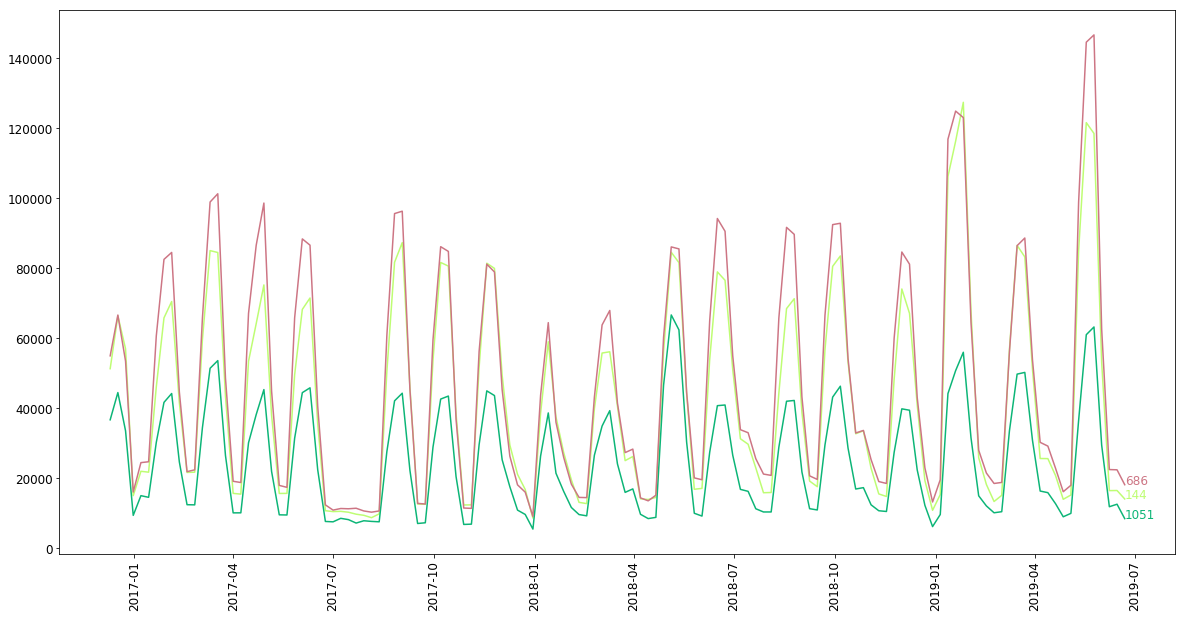

In [50]:

mycolors = np.random.choice(list(mpl.colors.XKCD_COLORS.keys()), len(set(df.sku)), replace=False)
plt.figure(figsize=(20,10))
plt.xticks(rotation=90)
for i in range(len(cluster1)):
    plt.plot(train[train.sku==cluster1[i]].Date, train[train.sku==cluster1[i]].target,  color=mycolors[i])
    last_x, last_y = train[train.sku==cluster1[i]].Date.values[-1], train[train.sku==cluster1[i]].target.values[-1]
    plt.text(last_x, last_y, str(cluster1[i]), color=mycolors[i])

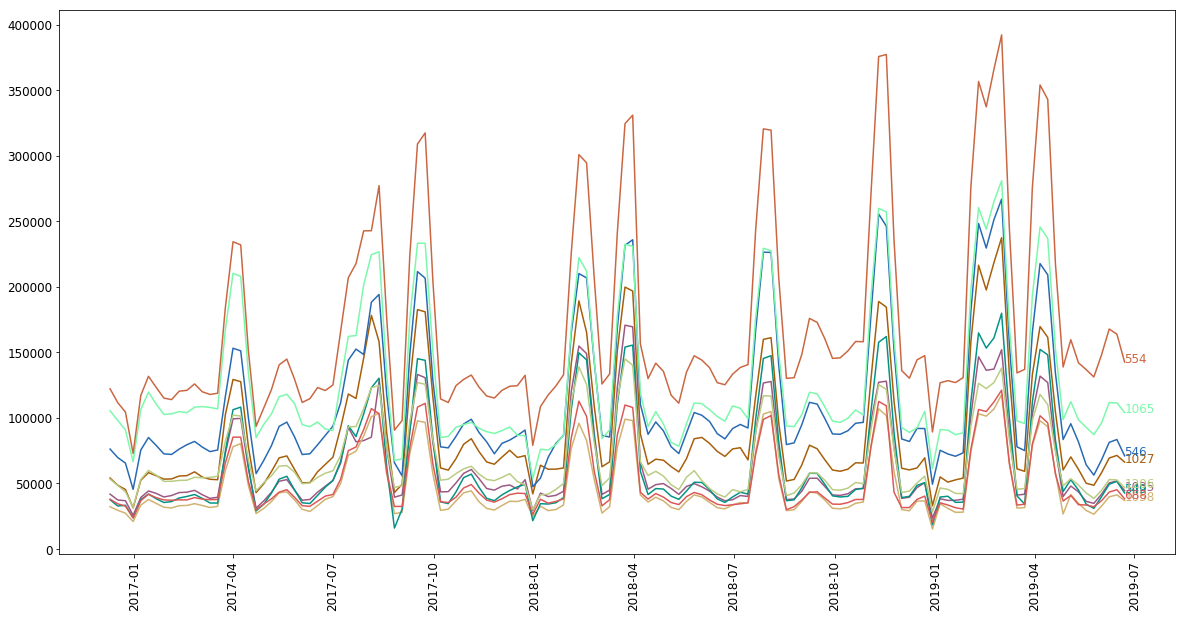

In [51]:

mycolors = np.random.choice(list(mpl.colors.XKCD_COLORS.keys()), len(set(df.sku)), replace=False)
plt.figure(figsize=(20,10))
plt.xticks(rotation=90)
for i in range(len(cluster2)):
    plt.plot(train[train.sku==cluster2[i]].Date, train[train.sku==cluster2[i]].target,  color=mycolors[i])
    last_x, last_y = train[train.sku==cluster2[i]].Date.values[-1], train[train.sku==cluster2[i]].target.values[-1]
    plt.text(last_x, last_y, str(cluster2[i]), color=mycolors[i])

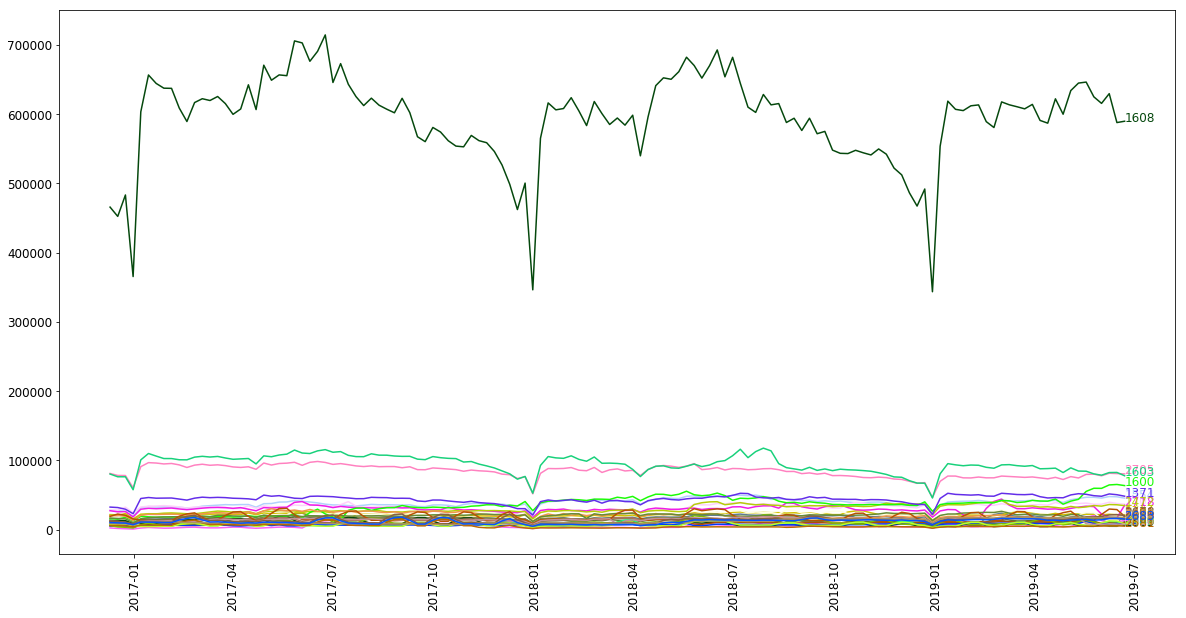

In [52]:

mycolors = np.random.choice(list(mpl.colors.XKCD_COLORS.keys()), len(set(df.sku)), replace=False)
plt.figure(figsize=(20,10))
plt.xticks(rotation=90)
for i in range(len(cluster3)):
    plt.plot(train[train.sku==cluster3[i]].Date, train[train.sku==cluster3[i]].target,  color=mycolors[i])
    last_x, last_y = train[train.sku==cluster3[i]].Date.values[-1], train[train.sku==cluster3[i]].target.values[-1]
    plt.text(last_x, last_y, str(cluster3[i]), color=mycolors[i])

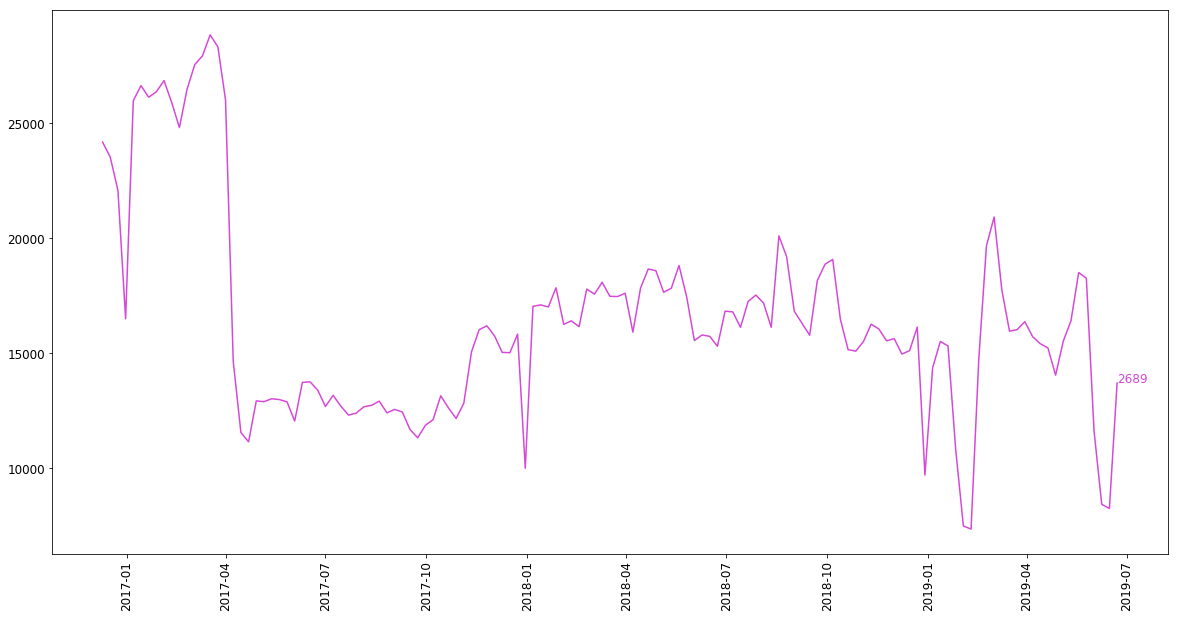

In [53]:

mycolors = np.random.choice(list(mpl.colors.XKCD_COLORS.keys()), len(set(df.sku)), replace=False)
plt.figure(figsize=(20,10))
plt.xticks(rotation=90)
for i in range(len(cluster4)):
    plt.plot(train[train.sku==cluster4[i]].Date, train[train.sku==cluster4[i]].target,  color=mycolors[i])
    last_x, last_y = train[train.sku==cluster4[i]].Date.values[-1], train[train.sku==cluster4[i]].target.values[-1]
    plt.text(last_x, last_y, str(cluster4[i]), color=mycolors[i])

# Sihlouette